## MPG Kaynağını Keşfetmek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
            delimiter="\s+", #regex alabilir. \s boşluk + değişen uzunlukta
            header=None,
            names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"],
            index_col = "car name" #satır etiketi
           )

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.shape
df.columns
df.index

#
df.index.nunique() #305 farklı araç var. Bazı araçların farklı modelleri de  mevcut.

#
set(df.cylinders) #benzersiz olarak silindirleri görelim.
df.cylinders.value_counts() #hangi silindirden kaç tane var.

#
df.isnull().any().any() #tabloda herhangi bir null var mı?

#
df.describe().T #sayısal alanlarla ilgili istatistik.

#
df.dtypes #horsepower alanı sayı olmalıydı.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 44.1+ KB


### Horsepower alanına odaklanalım.
* Neden float değil? Engelleyen veriler neler?

In [5]:
#gelen verinin float olup olamayacağın ıdöndüren bir fonskiyon yazalım.
def isNotFloat(deger):
    try:
        deger = float(deger)
    except:
        return True
    else:
        return False
#-----------------

df.applymap(isNotFloat).any() #herhangi bir float olmayan deger tutan kolon var mı?
'''
    isNotFloat
    np.isreal
    np.str.isnumeric
    df.horsepower.map(str.isnumeric)
'''

#
filtre_horsepower_float_olmayan = df.horsepower.map(isNotFloat) #map seride kullanılır

#
df.loc[filtre_horsepower_float_olmayan, "horsepower"] #içinde ? olan satırlar varmış. set ile benzersizi alabilirz.

car name
ford pinto              ?
ford maverick           ?
renault lecar deluxe    ?
ford mustang cobra      ?
renault 18i             ?
amc concord dl          ?
Name: horsepower, dtype: object

In [6]:
#ortalama hesaplayalım ve satırlara basalım
#~ ile mantıksal tersini aldık. np.logical_not ile aynı
hp_mean = df.loc[~filtre_horsepower_float_olmayan, "horsepower"].astype(float).mean()
hp_mean = round(hp_mean,2)
hp_mean

#
df.loc[filtre_horsepower_float_olmayan, "horsepower"] = hp_mean

#
#df.dtypes
df = df.astype({"horsepower":np.float16})
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float16
weight          float64
acceleration    float64
model year        int64
origin            int64
dtype: object

### Matplotlib ile Görselleştirelim

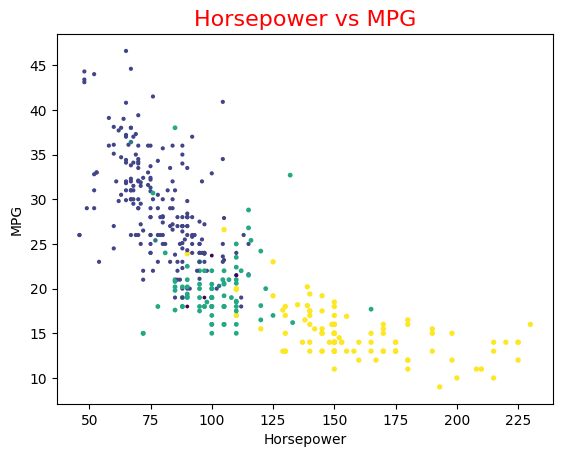

In [7]:
#dir(plt)
plt.scatter(x=df.horsepower, y=df.mpg, 
            s=df.cylinders, #baloncuklar silindire göre ölçeklendirilsin.
            c=df.cylinders) #silindirlere göre renklendirsin. #direk renk verebiliriz.

plt.title("Horsepower vs MPG", fontsize=16, color="red")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

plt.show()

In [8]:
#zoom edilebilir. interaktif çizim alanı için
%matplotlib notebook

In [9]:
#çizim alanını oluştururken projectionı vermek için böyle yaptık.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d") #1 satır 1 kolonluk plotlarda 1. sini yakaladık. (111): nrow, ncol, index 

#plt ile aynı şey
ax.scatter(xs=df.horsepower, ys=df.weight, zs=df.mpg)

plt.show()

<IPython.core.display.Javascript object>

### Gruplama ve Pandas ile Görselleştirme

In [10]:
grp_mpg = df.groupby(by=["model year"]).agg({"mpg":["max","min","mean","count"]})
grp_mpg.head()

mpg                       
             max   min       mean count
model year                             
70          27.0   9.0  17.689655    29
71          35.0  12.0  21.250000    28
72          28.0  11.0  18.714286    28
73          29.0  11.0  17.100000    40
74          32.0  13.0  22.703704    27

#### Pandas ile Görselleştirme
* pandas df hakkında hakkında bilgiye sahip olduğu için çalışması daha kolay olabiliyor.
* kolon adları direkt text olarak verebiliyoruz.
* index etiketlerini x olarak kullanabiliyor.

In [11]:
#zoom edilebilir. interaktif çizim alanı için
%matplotlib inline

<Axes: xlabel='model year'>

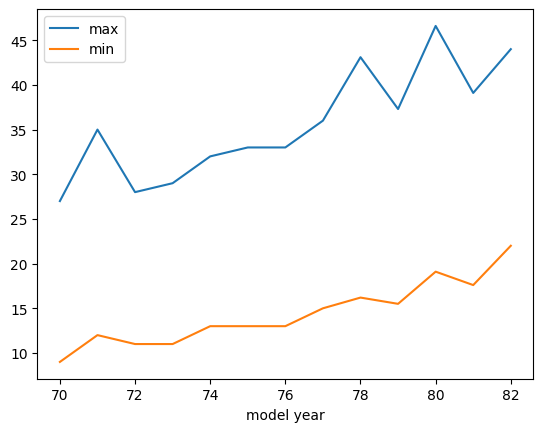

In [12]:
#grp_mpg.loc[:,("mpg",["max","min"])].mpg
df_mpg_info = grp_mpg.mpg.loc[:, ["max","min"]]

df_mpg_info.plot(y=["max","min"]) #x verilmezse satır indexi x olarak kabul edilir. kolon isimleri direkt kullanılabilir.

<Axes: xlabel='horsepower', ylabel='mpg'>

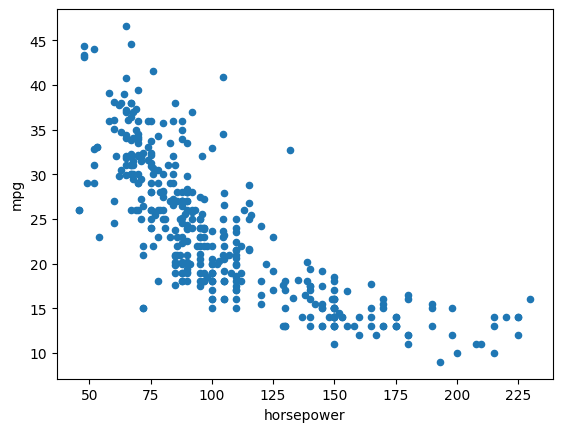

In [13]:
#kind
#df.plot(x="horsepower", y="mpg", kind="scatter") #kind ile grafik türü belirtilebilir

#direkt grafik
df.plot.scatter(x="horsepower", y="mpg")

## Veritabanına Kaydetme

In [16]:
import sqlalchemy as sqla
import pyodbc 

engine = sqla.create_engine("mssql+pyodbc://localhost/AdventureWorks2012?driver=ODBC Driver 17 for SQL Server")

df=df.reset_index() #index etiketlerini kolona alalım. bu özellik sql tablolarında mevcut değil.
df.to_sql(name="myMPG",schema="Production",con=engine,if_exists="replace",index=False)

-1